### WEATHER PREDICTION USING MACHINE LEARNING CLASSIFICATION MODELS BY EXPLORING INFLUENCING FACTORS

#### Importing necessary libraries and datasets for preview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn.metrics 
from sklearn.metrics import classification_report



In [3]:
# import and view dataset
my_data = pd.read_csv("D:/BODY/DS_Projects/Machine Learning/seattle-weather.csv")
print(my_data)


            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


In [4]:
pd.isnull(my_data)

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


In [5]:
my_data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

#### Here we begin doing some plots to visualize our data and some exploratory data analysis

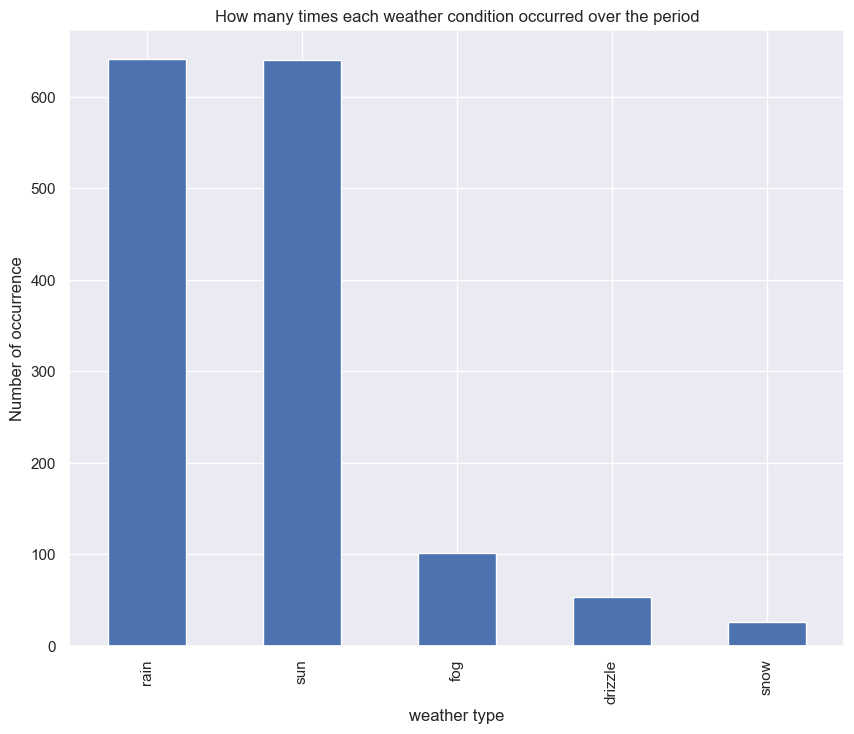

In [6]:
# visualizing how the different weather conditions occurred over the period
occurence = my_data['weather'].value_counts()[:10]
occurence.plot(kind= 'bar', figsize=(10,8))
plt.title('How many times each weather condition occurred over the period')
plt.ylabel('Number of occurrence')
plt.xlabel('weather type')
plt.show()

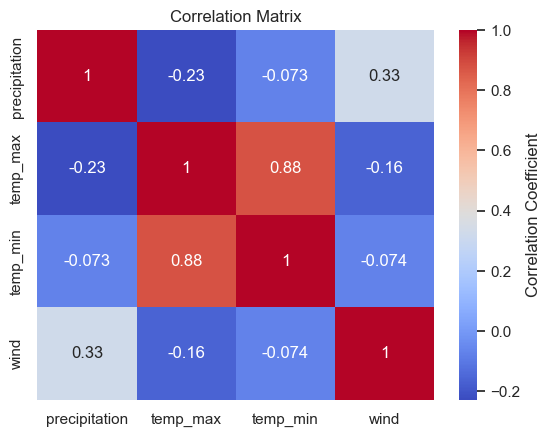

In [7]:
# Compute correlation matrix
numeric_data = my_data.select_dtypes(include=['float64', 'int64'])
heatmap = numeric_data.corr()
sns.heatmap(heatmap, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix")
plt.show() # Plot heatmap


<Figure size 1300x1700 with 0 Axes>

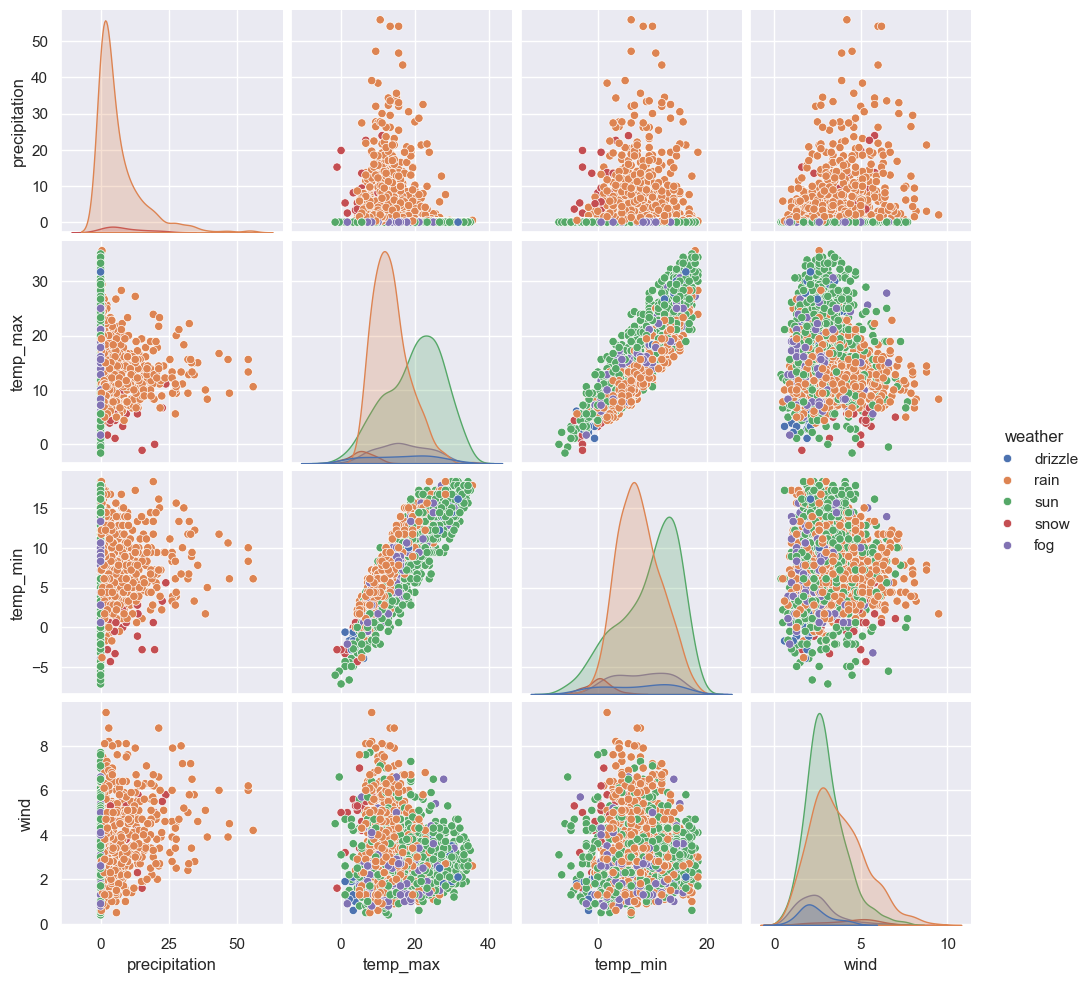

In [8]:
plt.figure(figsize=(13,17))
sns.pairplot(data=my_data, hue='weather')
plt.show()

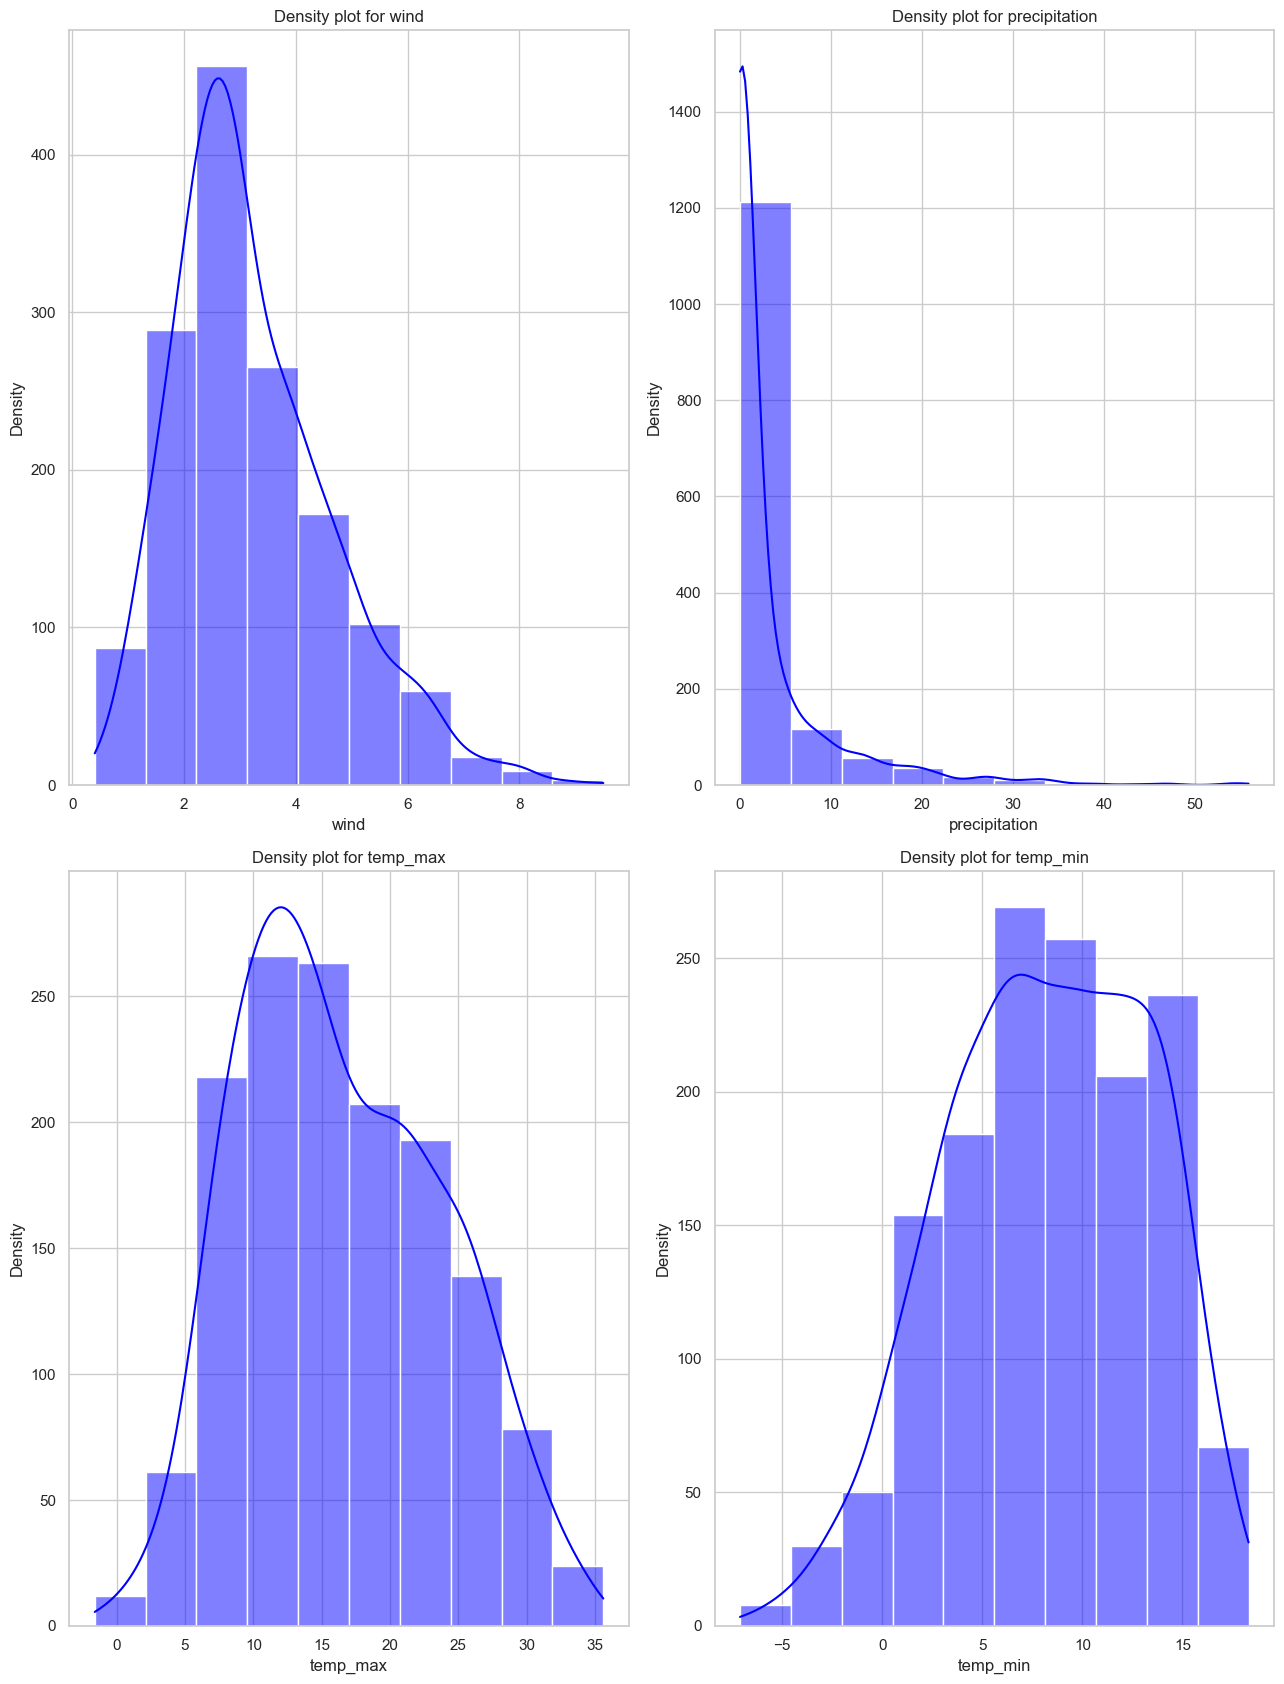

In [9]:
data = my_data
numeric =['wind', 'precipitation', 'temp_max', 'temp_min']
sns.set(style='whitegrid')
plt.figure(figsize=(13,17))
for i, var in enumerate(numeric, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[var], kde=True, color='blue', bins=10)
    plt.title(f'Density plot for {var}')
    plt.xlabel(var)
    plt.ylabel('Density')


plt.tight_layout()
plt.show()

In [10]:
# finding the minimum and maximum values of each column
from sklearn.preprocessing import MinMaxScaler
def dataset_minmax(my_data):
    minmax = list()
    for i in range(len(my_data[0])):
        col_values = [row[i] for row in my_data]
        value_min = min(col_values)
        value_max = max(col-values)
        minmax.append([value_min, value_max])
        return minmax

In [11]:
# normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = (scaler.fit_transform(my_data[numeric]))
print(data_scaled)

[[0.47252747 0.         0.38709677 0.47637795]
 [0.45054945 0.19499106 0.32795699 0.38976378]
 [0.20879121 0.01431127 0.35752688 0.56299213]
 ...
 [0.24175824 0.         0.23655914 0.30314961]
 [0.32967033 0.         0.19354839 0.24015748]
 [0.34065934 0.         0.19354839 0.19685039]]


In [12]:
# split the data into n-folds
def cross_validation_split(my_data, n_folds):
    my_data_split =list()
    my_data_split = list(my_data)
    fold_size = int(len(my_data) / n-folds)
    for _ in range(n-folds):
        fold =list()
        while len(fold) < fold_size:
            index = randrange(len(my_data_copy))
            my_data_split.append(fold)  
            
    return my_data_split
            


In [13]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
            return correct / float (len(actual)) * 100.0
            

In [14]:
# split the dataset for training and testing using a 60-30 ratio
from sklearn.model_selection import train_test_split
Y = my_data['weather']
X = my_data.drop(columns=['weather', 'date'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (1022, 4)
Y train shape:  (1022,)
X test shape:  (439, 4)
Y test shape:  (439,)


### K-Nearest Neighbour


Training Accuracy for different n_neighbors: [0.99706458 0.85029354 0.83365949 0.81898239 0.81311155 0.81311155
 0.80528376 0.80626223]


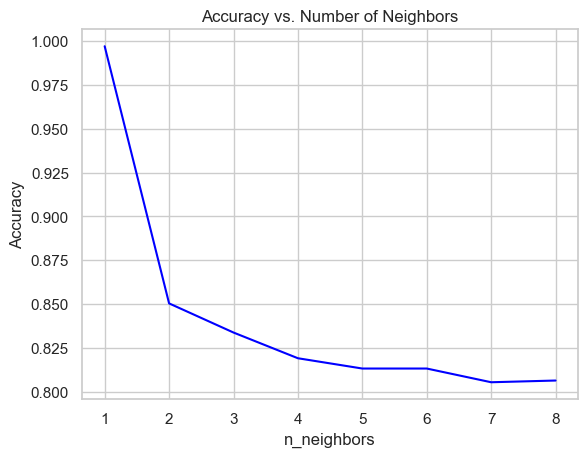

In [15]:
# plotting to find the n_neighbor
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
for i, K in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
print("Training Accuracy for different n_neighbors:", train_accuracy)

# Plotting the accuracy
plt.plot(neighbors, train_accuracy, linestyle='-', color='blue', label='Train Accuracy')   
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Using Grid search for hyper-parameter tuning
from sklearn.model_selection import GridSearchCV 
weight_options = ['uniform', 'distance']
metric_options = ['euclidean', 'minkowski']
number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

param_grid = dict(n_neighbors=number, weights=weight_options, metric=metric_options)
print(param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, Y_train)
print(grid.best_score_)
print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'minkowski']}
0.7563011612411955
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
    mean_test_score  std_test_score  \
0          0.711289        0.039655   
1          0.711289        0.039655   
2          0.667304        0.035459   
3          0.711289        0.039655   
4          0.721083        0.038843   
5          0.725976        0.032004   
6          0.728898        0.028955   
7          0.736741        0.034421   
8          0.747478        0.036257   
9          0.745517        0.035551   
10         0.742595        0.028932   
11         0.749438        0.030280   
12         0.748487        0.027060   
13         0.756301        0.027973   
14         0.747497        0.026333   
15         0.755283        0.032802   
16         0.753379        0.027641   
17         0.750419        0.025096   
18         0.745526        0.027186   
19         0.

In [18]:
# applying KNN algorithm to the data
knn_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 7, weights = 'distance')
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [19]:
y_pred = knn_model.predict(X_test)

In [20]:
# printing the accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(Y_test, y_pred)

0.7608200455580866

In [21]:
confusion_matrix(Y_test, y_pred)

array([[  1,   1,   0,   0,  12],
       [  1,   1,   2,   0,  28],
       [  1,   0, 164,   0,  27],
       [  0,   1,   4,   0,   3],
       [  3,   9,  13,   0, 168]], dtype=int64)

In [22]:
print(Y_train.value_counts())

weather
rain       449
sun        447
fog         69
drizzle     39
snow        18
Name: count, dtype: int64


### Balancing the dataset using SMOTETOMEK

In [23]:
# importing smoke tomek library
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [24]:
# Applying Smote Tomek to balance the data
smote_tomek = SMOTETomek()
X_resampled, Y_resampled = smote_tomek.fit_resample(X_train, Y_train)

c:\Users\MY PC\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\MY PC\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\MY PC\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [25]:
# split the resampled data into train and test sets
X_train_resampled, X_test_resampled, Y_train_resampled, Y_test_resampled = train_test_split(X_resampled, Y_resampled)

In [26]:
# Perfroming grid search on the resampled data
weight_options = ['uniform', 'distance']
metric_options = ['euclidean', 'minkowski']
number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=number, weights=weight_options, metric=metric_options)
# param_grid =dict(n_neighbors=number)
print(param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train_resampled, Y_train_resampled)
print(grid.best_score_)
print(grid.best_params_)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'minkowski']}
0.8517132951705232
{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}


,mean_test_score,std_test_score,params
0,0.851076,0.025631,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
1,0.851076,0.025631,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
2,0.809058,0.023126,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
3,0.851713,0.025604,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
4,0.814134,0.026670,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."
5,0.835782,0.024738,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."
6,0.791849,0.020582,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei..."
7,0.825603,0.021974,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei..."
8,0.781025,0.021413,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei..."
9,0.818596,0.018190,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei..."


In [27]:
# Applying the knn model on the resampled data using grid search for hyper parameter tuning
knn_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 1, weights = 'distance')
knn_model.fit(X_train_resampled, Y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='distance')

In [28]:
y_pred = knn_model.predict(X_test_resampled)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(Y_test_resampled, y_pred)
print(classification_report(Y_test_resampled, y_pred))

              precision    recall  f1-score   support

     drizzle       0.83      0.94      0.88        97
         fog       0.80      0.95      0.87       106
        rain       0.94      0.87      0.90       116
        snow       0.98      1.00      0.99       108
         sun       0.86      0.63      0.73        97

    accuracy                           0.88       524
   macro avg       0.88      0.88      0.87       524
weighted avg       0.89      0.88      0.88       524



In [30]:
print(Y_test_resampled.value_counts())

weather
rain       116
snow       108
fog        106
drizzle     97
sun         97
Name: count, dtype: int64


In [31]:
confusion_matrix(Y_test_resampled, y_pred)

array([[ 91,   4,   1,   0,   1],
       [  2, 101,   0,   0,   3],
       [  2,   5, 101,   2,   6],
       [  0,   0,   0, 108,   0],
       [ 14,  16,   6,   0,  61]], dtype=int64)

### Random Forest Classifier

In [32]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating a random forest classifier
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(1, 14))}]

clf = GridSearchCV(rfc, forest_params, cv=10, scoring='accuracy')

y_pred_rfc = clf.fit(X_train_resampled, Y_train_resampled)

# Get the best estimator from the grid search
best_rfc = clf.best_estimator_

y_pred_rfc = clf.fit(X_train_resampled, Y_train_resampled)

#Get the best estimator from the grid search
best_rfc = clf.best_estimator_

# Make predictions using the best estimator
y_pred_best_rfc = best_rfc.predict(X_test_resampled)

# print the best parameters and score
print(clf.best_params_)
print(clf.best_score_)

# print the classification report using the actual predictions
print(classification_report(Y_test_resampled, y_pred_best_rfc))

### Gradient Boosting Classifier

In [34]:
# Gradient-boosting classifier
%pip install -U scikit-learn
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
# creating the gradient bossting classfier
gbc = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.05, random_state = 100, max_features = 5)
gbc.fit(X_train_resampled, Y_train_resampled)

# Generate predictions using the fitted model
y_pred_gbc = gbc.predict(X_test_resampled)

print("GBC accuracy is %2.2f" % accuracy_score(Y_test_resampled, y_pred_gbc))
print(classification_report(Y_test_resampled, y_pred_gbc))

GBC accuracy is 0.88
              precision    recall  f1-score   support

     drizzle       0.88      0.82      0.85       110
         fog       0.79      0.88      0.83       109
        rain       0.95      0.95      0.95       111
        snow       0.96      0.99      0.97        93
         sun       0.82      0.77      0.80       101

    accuracy                           0.88       524
   macro avg       0.88      0.88      0.88       524
weighted avg       0.88      0.88      0.88       524



### Naive Bayes Classification

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [40]:
# creating and evaluating the GNB classifier
gnb = GaussianNB()
y_pred = gnb.fit(X_train_resampled, Y_train_resampled).predict(X_test_resampled)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test_resampled !=y_pred).sum()))

Number of mislabeled points out of a total 439 points : 182


In [42]:
from sklearn.metrics import accuracy_score

# we run the model on the train data

# Here we train the model using the resampled training data
gnb.fit(X_train_resampled, Y_train_resampled)

# then proceed to make predictions on the training data
predict_train = gnb.predict(X_train_resampled)

# Before evaluating the accuracy of the training data
accuracy_train = accuracy_score(Y_train_resampled, predict_train)
print('accuracy_score on the train dataset: ', accuracy_train)

accuracy_score on the train dataset:  0.6583811344805609


In [43]:
# we  run the model on the test data
# then proceed to make predictions on the training data
# predict the target on the test dataset
predict_test = gnb.predict(X_test_resampled)

# accuracy score on test dataset
accuracy_test = accuracy_score(Y_test_resampled, predict_test)
print('accuracy_score on the test dataset: ', accuracy_test)
print(classification_report(Y_test_resampled, y_pred))

accuracy_score on the test dataset:  0.6526717557251909
              precision    recall  f1-score   support

     drizzle       0.59      0.37      0.46       110
         fog       0.46      0.58      0.51       109
        rain       0.96      0.86      0.90       111
        snow       0.86      0.96      0.91        93
         sun       0.47      0.53      0.50       101

    accuracy                           0.65       524
   macro avg       0.67      0.66      0.66       524
weighted avg       0.67      0.65      0.65       524



In [44]:
# check for overfitting 
print('Training score: {0:0.4f}'.format(gnb.score(X_train_resampled, Y_train_resampled)))
print('Testing score: {0:0.4f}'.format(gnb.score(X_test_resampled, Y_test_resampled)))

Training score: 0.6584
Testing score: 0.6527


### Support Vector Machine

In [45]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_resampled, Y_train_resampled)
# print prediction results
predictions = svc.predict(X_test_resampled)
print(classification_report(Y_test_resampled, predictions))

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_resampled, Y_train_resampled)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_resampled, Y_test_resampled)))

              precision    recall  f1-score   support

     drizzle       0.79      0.21      0.33       110
         fog       0.39      0.78      0.52       109
        rain       0.95      0.75      0.84       111
        snow       0.90      0.97      0.93        93
         sun       0.43      0.39      0.41       101

    accuracy                           0.61       524
   macro avg       0.69      0.62      0.61       524
weighted avg       0.69      0.61      0.60       524

Accuracy on training set: 0.658
Accuracy on test set: 0.611


In [47]:
# apply grid search to find the best parameter combination
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid = {'C': [0.1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_resampled, Y_train_resampled)

# print best parameter after tuning 
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.586 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.567 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.631 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.645 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.685 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.666 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.611 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [51]:
grid_predictions = grid.predict(X_test_resampled)

# print classifications report
print(classification_report(Y_test_resampled, grid_predictions))

              precision    recall  f1-score   support

     drizzle       0.79      0.96      0.87       110
         fog       0.80      0.89      0.84       109
        rain       0.94      0.86      0.90       111
        snow       0.97      1.00      0.98        93
         sun       0.81      0.56      0.67       101

    accuracy                           0.86       524
   macro avg       0.86      0.86      0.85       524
weighted avg       0.86      0.86      0.85       524



In [52]:
#print accuracy score after grid tuning 
print(accuracy_score(Y_test_resampled, grid_predictions)*100)

85.68702290076335


In [1]:
import matplotlib.pyplot as plt

# calculate the accuracy for each model
knn_accuracy = accuracy_score(Y_test_resampled, knn_model.predict(X_test_resampled))
rf_accuracy = accuracy_score(Y_test_resampled, clf.predict(X_test_resampled))
gbc_accuracy = accuracy_score(Y_test_resampled, gbc.predict(X_test_resampled))
gnb_accuracy = accuracy_score(Y_test_resampled, gnb.predict(X_test_resampled))
svm_accuarcy = accuracy_score(Y_test_resampled, svc.predict(X_test_resampled))

# Define the models and their corresponding accuracy scores
models = ['KNN', 'Random Forest', 'Gradient Boosting', 'Naive Bayes', 'SVM']
accuracies = [knn_accuracy, rf_accuracy, gbc_accuracy, gnb_accuracy,  svm_accuarcy]

# plot the bar plot
plt.figure(figsize=(12, 15))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.5, 1.0) #adjust ylim if necessary
plt.xticks(rotation=45) #rotate x-axis label for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
                        

NameError: name 'accuracy_score' is not defined